In [ ]:
## Checking the Chapter from Sebastian's Book

## Checking Dataset, and its characteristics

In [107]:
#Download MNIST data
from sklearn.datasets import fetch_openml

In [108]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')

In [109]:
X.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [110]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
y.values

['5', '0', '4', '1', '9', ..., '2', '3', '4', '5', '6']
Length: 70000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [112]:
y.astype(int).values.shape

(70000,)

In [113]:
X=X.values
y=y.astype(int).values

In [114]:
y

array([5, 0, 4, ..., 4, 5, 6])

In [115]:
img = X[y==1][0].reshape(28,28)
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [138]:
X.dtype

dtype('int64')

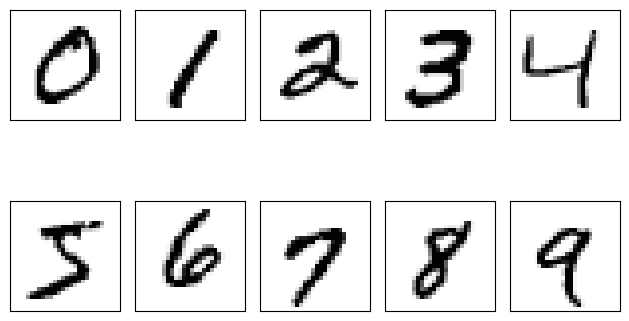

In [116]:
#Visualize Data in X 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(10):
    img = X[y==i][0].reshape(28,28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()


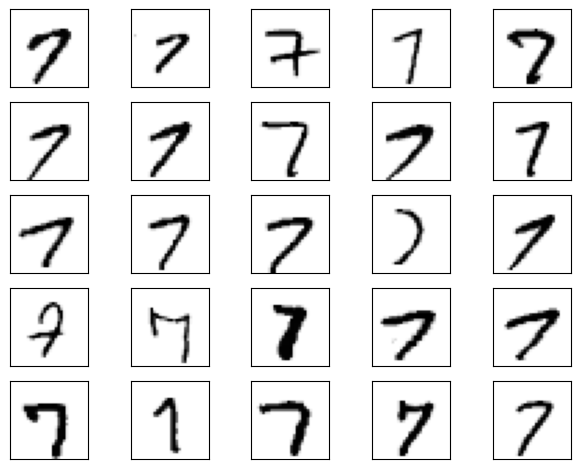

In [117]:
# Checking  multiple images of same number, to check the variations
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(25):
    img = X[y==7][i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

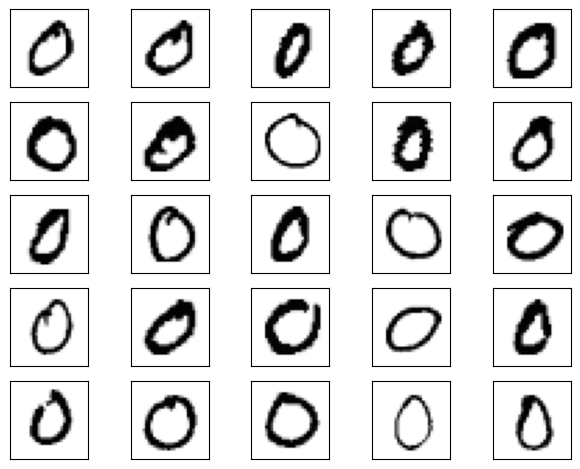

In [118]:
# Checking  multiple images of same number, to check the variations
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(25):
    img = X[y==0][i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [119]:
#Dividing dataset into train, validation and test sets
from sklearn.model_selection import train_test_split

In [120]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=10000, random_state=123, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=5000, random_state=123, stratify=y_temp)

In [121]:
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((55000, 784), (5000, 784), (10000, 784), (55000,), (5000,), (10000,))

## Implement MLP Class

In [122]:
import numpy as np

In [123]:
def sigmoid(z):
    return 1./(1. + np.exp(-z))

In [124]:
def int_to_onehot(y, num_labels):
    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1
    return ary

In [142]:
class MLP:
    def __init__(self,num_features,num_hidden,num_classes,random_seed=123):
        super().__init__()
        self.num_features=num_features
        self.num_hidden=num_hidden
        self.num_classes=num_classes
        self.random_seed=random_seed
        
        #hidden layer
        rng = np.random.RandomState(self.random_seed)
        self.weight_h = np.array(rng.normal(loc=0.0, scale=0.1, size=(self.num_hidden, self.num_features)),dtype=np.float64)
        self.bias_h = np.zeros(self.num_hidden, dtype=np.float64)
        
        #output layer
        self.weight_out = np.array(rng.normal(loc=0.0, scale=0.1, size=(self.num_classes, self.num_hidden)),dtype=np.float64)
        self.bias_out=np.zeros(num_classes, dtype=np.float64)
        
    
    def forward(self,x):
        """
        # Hidden Layer
        input dimension = [n_examples, n_features]
        hidden layer dimension = [n_hidden, n_features]
        output dimension = [n_examples, n_features].dot[n_hidden, n_feature].T
                     = n_exampls, n_hidden]
        
        # Output Layer
        input dimension = [n_examples, n_hidden]
        output layer dimension = [n_classes, n_hidden]
        output dimension = [n_examples, n_hidden].dot[n_classes,n_hidden].T
                         = [n_examples, n_classes]
        """     
        z_h = np.dot(x, self.weight_h.T) + self.bias_h
        a_h = sigmoid(z_h)
        
        z_out = np.dot(a_h, self.weight_out.T) + self.bias_out
        a_out = sigmoid(z_out)
        return a_h, a_out
    
    def backward(self, x, a_h, a_out, y):
        # one hot encoding
        y_onehot = int_to_onehot(y, self.num_classes)
        
        #Part 1 dLoss/dOutWeights
        #########################
        ### Output layer weights
        #########################
        
        # onehot encoding
        y_onehot = int_to_onehot(y, self.num_classes)

        # Part 1: dLoss/dOutWeights
        ## = dLoss/dOutAct * dOutAct/dOutNet * dOutNet/dOutWeight
        ## where DeltaOut = dLoss/dOutAct * dOutAct/dOutNet
        ## for convenient re-use
        
        # input/output dim: [n_examples, n_classes]
        d_loss__d_a_out = 2.*(a_out - y_onehot) / y.shape[0]

        # input/output dim: [n_examples, n_classes]
        d_a_out__d_z_out = a_out * (1. - a_out) # sigmoid derivative

        # output dim: [n_examples, n_classes]
        delta_out = d_loss__d_a_out * d_a_out__d_z_out # "delta (rule) placeholder"

        # gradient for output weights
        
        # [n_examples, n_hidden]
        d_z_out__dw_out = a_h
        
        # input dim: [n_classes, n_examples] dot [n_examples, n_hidden]
        # output dim: [n_classes, n_hidden]
        d_loss__dw_out = np.dot(delta_out.T, d_z_out__dw_out)
        d_loss__db_out = np.sum(delta_out, axis=0)
        

        #################################        
        # Part 2: dLoss/dHiddenWeights
        ## = DeltaOut * dOutNet/dHiddenAct * dHiddenAct/dHiddenNet * dHiddenNet/dWeight
        
        # [n_classes, n_hidden]
        d_z_out__a_h = self.weight_out
        
        # output dim: [n_examples, n_hidden]
        d_loss__a_h = np.dot(delta_out, d_z_out__a_h)
        
        # [n_examples, n_hidden]
        d_a_h__d_z_h = a_h * (1. - a_h) # sigmoid derivative
        
        # [n_examples, n_features]
        d_z_h__d_w_h = x
        
        # output dim: [n_hidden, n_features]
        d_loss__d_w_h = np.dot((d_loss__a_h * d_a_h__d_z_h).T, d_z_h__d_w_h)
        d_loss__d_b_h = np.sum((d_loss__a_h * d_a_h__d_z_h), axis=0)

        return d_loss__dw_out, d_loss__db_out, d_loss__d_w_h, d_loss__d_b_h

In [143]:
model = MLP(num_features=28*28, num_hidden=50, num_classes=10)

In [144]:
#Mini Batch Generator
num_epochs = 50
minibatch_size = 100

def minibatch_generator(X,y,minibatch_size):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    for start_idx in range(0, indices.shape[0]-minibatch_size + 1, minibatch_size):
        batch_idx=indices[start_idx:start_idx+minibatch_size]
        yield X[batch_idx], y[batch_idx]

In [145]:
# Checking Batch Generator
for i in range(num_epochs):
    #iterate over minibatchs
    minibatch_gen = minibatch_generator(X_train, y_train, minibatch_size)
    
    for x_train_mini, y_train_mini in minibatch_gen:
        break
    break
print(x_train_mini.shape, y_train_mini.shape)

(100, 784) (100,)


In [146]:
# Simple Loss Function
def mse_loss(targets, probas, num_labels=10):
    onehot_targets = int_to_onehot(targets, num_labels=num_labels)
    return np.mean((onehot_targets - probas)**2)

In [147]:
def accuracy(targets, predicted_labels):
    return np.mean(predicted_labels == targets)

In [148]:
_, probas = model.forward(X_valid)
mse = mse_loss(y_valid, probas)
print(f'Initial Validation MSE: {mse:.1f}')

Initial Validation MSE: 0.2


C:\Users\sanja\AppData\Local\Temp\ipykernel_22400\466322499.py:2: RuntimeWarning: overflow encountered in exp
  return 1./(1. + np.exp(-z))


In [132]:
predicted_labels = np.argmax(probas, axis=1)
acc = accuracy(y_valid, predicted_labels)
print(f'Initial Validation Accuracy: {acc}')

Initial Validation Accuracy: 0.112


In [133]:
def compute_mse_and_acc(nnet, X,y, num_labels=10, minibatch_size=100):
    mse, correct_pred, num_examples = 0., 0, 0
    minibatch_gen = minibatch_generator(X, y, minibatch_size)
    for i, (features, targets) in enumerate(minibatch_gen):
        _, probas = nnet.forward(features)
        predicted_labels = np.argmax(probas, axis=1)
        onehot_targets = int_to_onehot(targets, num_labels = num_labels)
        loss = np.mean((onehot_targets)**2)
        correct_pred += (predicted_labels==targets).sum()
        num_examples+= targets.shape[0]
        mse+=loss
    mse= mse/i
    acc=correct_pred/num_examples
    return mse, acc

In [134]:
#Check function on validation dataset
acc, mse = compute_mse_and_acc(model, X_valid, y_valid)
print(f'Initial Valid MSE: {mse:0.1f}, and Valid Acc= {acc*100:.1f}%')

Initial Valid MSE: 0.1, and Valid Acc= 10.2%


C:\Users\sanja\AppData\Local\Temp\ipykernel_22400\466322499.py:2: RuntimeWarning: overflow encountered in exp
  return 1./(1. + np.exp(-z))


In [135]:
def train(model, X_train, y_train, X_valid, y_valid, num_epochs,
          learning_rate=0.1):
    
    epoch_loss = []
    epoch_train_acc = []
    epoch_valid_acc = []
    
    for e in range(num_epochs):

        # iterate over minibatches
        minibatch_gen = minibatch_generator(
            X_train, y_train, minibatch_size)

        for X_train_mini, y_train_mini in minibatch_gen:
            
            #### Compute outputs ####
            a_h, a_out = model.forward(X_train_mini)

            #### Compute gradients ####
            d_loss__d_w_out, d_loss__d_b_out, d_loss__d_w_h, d_loss__d_b_h = \
                model.backward(X_train_mini, a_h, a_out, y_train_mini)

            #### Update weights ####
            model.weight_h -= learning_rate * d_loss__d_w_h
            model.bias_h -= learning_rate * d_loss__d_b_h
            model.weight_out -= learning_rate * d_loss__d_w_out
            model.bias_out -= learning_rate * d_loss__d_b_out
        
        #### Epoch Logging ####        
        train_mse, train_acc = compute_mse_and_acc(model, X_train, y_train)
        valid_mse, valid_acc = compute_mse_and_acc(model, X_valid, y_valid)
        train_acc, valid_acc = train_acc*100, valid_acc*100
        epoch_train_acc.append(train_acc)
        epoch_valid_acc.append(valid_acc)
        epoch_loss.append(train_mse)
        print(f'Epoch: {e+1:03d}/{num_epochs:03d} '
              f'| Train MSE: {train_mse:.2f} '
              f'| Train Acc: {train_acc:.2f}% '
              f'| Valid Acc: {valid_acc:.2f}%')

    return epoch_loss, epoch_train_acc, epoch_valid_acc

In [136]:
np.random.seed(123)
epoch_loss, epoch_train_acc, epoch_valid_acc = train(model,
                                                    X_train, y_train,
                                                    X_valid, y_valid,
                                                    num_epochs=50, learning_rate=0.1)

C:\Users\sanja\AppData\Local\Temp\ipykernel_22400\466322499.py:2: RuntimeWarning: overflow encountered in exp
  return 1./(1. + np.exp(-z))


Epoch: 001/050 | Train MSE: 0.10 | Train Acc: 81.13% | Valid Acc: 80.88%
Epoch: 002/050 | Train MSE: 0.10 | Train Acc: 85.61% | Valid Acc: 85.14%
Epoch: 003/050 | Train MSE: 0.10 | Train Acc: 87.64% | Valid Acc: 87.74%
Epoch: 004/050 | Train MSE: 0.10 | Train Acc: 88.67% | Valid Acc: 88.80%
Epoch: 005/050 | Train MSE: 0.10 | Train Acc: 89.02% | Valid Acc: 89.42%
Epoch: 006/050 | Train MSE: 0.10 | Train Acc: 89.49% | Valid Acc: 89.70%
Epoch: 007/050 | Train MSE: 0.10 | Train Acc: 90.08% | Valid Acc: 89.84%
Epoch: 008/050 | Train MSE: 0.10 | Train Acc: 90.13% | Valid Acc: 90.04%
Epoch: 009/050 | Train MSE: 0.10 | Train Acc: 90.69% | Valid Acc: 90.84%
Epoch: 010/050 | Train MSE: 0.10 | Train Acc: 90.31% | Valid Acc: 90.66%
Epoch: 011/050 | Train MSE: 0.10 | Train Acc: 91.03% | Valid Acc: 90.86%
Epoch: 012/050 | Train MSE: 0.10 | Train Acc: 90.87% | Valid Acc: 90.80%
Epoch: 013/050 | Train MSE: 0.10 | Train Acc: 91.11% | Valid Acc: 91.04%
Epoch: 014/050 | Train MSE: 0.10 | Train Acc: 91.53

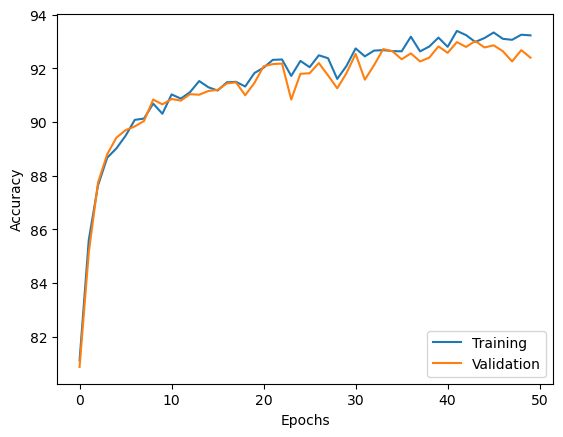

In [149]:
plt.plot(range(len(epoch_train_acc)), epoch_train_acc,
         label='Training')
plt.plot(range(len(epoch_valid_acc)), epoch_valid_acc,
         label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
#plt.savefig('figures/11_08.png', dpi=300)
plt.show()

In [150]:
# FAilure Cases
X_test_subset = X_test[:1000, :]
y_test_subset = y_test[:1000]

_, probas = model.forward(X_test_subset)
test_pred = np.argmax(probas, axis=1)

misclassified_images = X_test_subset[y_test_subset != test_pred][:25]
misclassified_labels = test_pred[y_test_subset != test_pred][:25]
correct_labels = y_test_subset[y_test_subset != test_pred][:25]

C:\Users\sanja\AppData\Local\Temp\ipykernel_22400\466322499.py:2: RuntimeWarning: overflow encountered in exp
  return 1./(1. + np.exp(-z))


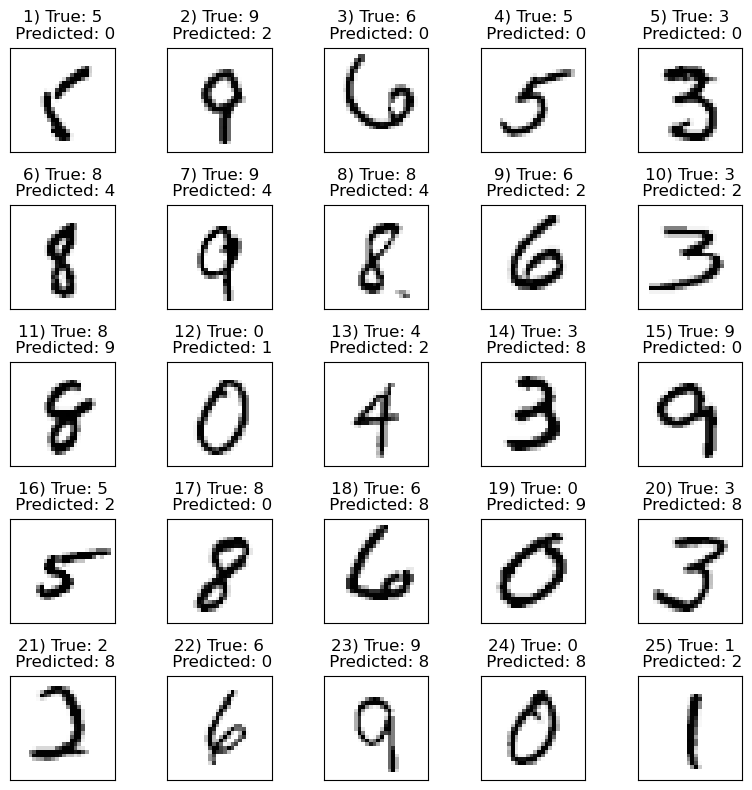

In [151]:
fig, ax = plt.subplots(nrows=5, ncols=5, 
                       sharex=True, sharey=True, figsize=(8, 8))
ax = ax.flatten()
for i in range(25):
    img = misclassified_images[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title(f'{i+1}) '
                    f'True: {correct_labels[i]}\n'
                    f' Predicted: {misclassified_labels[i]}')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
#plt.savefig('figures/11_09.png', dpi=300)
plt.show()